In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def traditional_gradient_descent(learning_rate, num_iterations, func, params_init = jnp.array([0.0, 0.0]), tolerance=1e-5):
  # Inicializar parâmetros
  params = params_init
  parameter_history = [params]

  # 3. Usar jax.grad para calcular o gradiente
  grad_func = jax.grad(func)

  for i in tqdm(range(num_iterations)):
    # Calcular o gradiente
    gradient = grad_func(params)

    # 4. Atualizar os parâmetros usando a fórmula do gradiente descendente tradicional
    params = params - learning_rate * gradient

    # 5. Registrar os valores dos parâmetros em cada iteração
    parameter_history.append(params)

    # Verificar condição de otimalidade (norma do gradiente)
    if jnp.linalg.norm(gradient) < tolerance:
        print(f"Convergência do gradiente atingida em {i+1} iterações.")
        break


  return jnp.array(parameter_history), i + 1

  0%|          | 0/100000 [00:00<?, ?it/s]

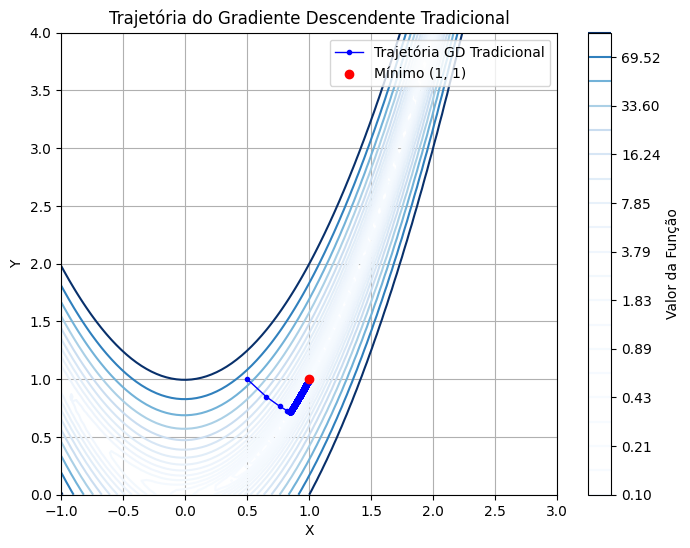

In [2]:
# 1. Definir uma função de exemplo para otimização (função quadrática simples)
@jax.jit
def example_function(params):
  x, y = params
  return (1.0 - x)**2 + 100*(y - x**2)**2

# Definir hiperparâmetros
learning_rate = 0.001
num_iterations = 100000
params_init = jnp.array([0.5, 1])

# Executar o gradiente descendente tradicional
parameter_history_trad, iterations_trad = traditional_gradient_descent(learning_rate, num_iterations, example_function, params_init=params_init)

# 6. Visualizar a trajetória do gradiente descendente
plt.figure(figsize=(8, 6))

# Adicionar curvas de nível
x = jnp.linspace(-1, 3, 100)
y = jnp.linspace(0, 4, 100)
X, Y = jnp.meshgrid(x, y)
Z = example_function(jnp.array([X, Y]))
contour = plt.contour(X, Y, Z, levels=jnp.logspace(-1, 2, 20), cmap='Blues')
plt.colorbar(contour, label='Valor da Função')


plt.plot(parameter_history_trad[:, 0], parameter_history_trad[:, 1], marker='o', linestyle='-', color='blue', label='Trajetória GD Tradicional', markersize=3, linewidth=1)
plt.scatter([1.0], [1.0], color='red', zorder=5, label='Mínimo (1, 1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Trajetória do Gradiente Descendente Tradicional')
plt.legend()
plt.grid(True)
plt.show()